In [3]:
pip install yfinance

In [4]:
import yfinance as yf
import calendar
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [17]:
df = yf.download('^GSPC')['Close'].to_frame()
df["Year"] = df.index.year
df["Month"] = df.index.month
df = df.resample('M').last()
df['variacion'] = df.Close.pct_change()
df.head(13)

[*********************100%***********************]  1 of 1 completed


,Close,Year,Month,variacion
Date,,,,
1950-01-31,17.049999,1950,1,NaN
1950-02-28,17.219999,1950,2,0.009971
1950-03-31,17.290001,1950,3,0.004065
1950-04-30,17.959999,1950,4,0.038751
1950-05-31,18.780001,1950,5,0.045657
1950-06-30,17.690001,1950,6,-0.058040
1950-07-31,17.840000,1950,7,0.008479
1950-08-31,18.420000,1950,8,0.032511
1950-09-30,19.450001,1950,9,0.055918


In [6]:
tabla = df.pivot_table(index = 'Year', columns = 'Month', values = 'variacion')
tabla.head(10)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1950,NaN,0.009971,0.004065,0.038751,0.045657,-0.058040,0.008479,0.032511,0.055918,0.004113,-0.001024,0.047155
1951,0.060206,0.006463,-0.014679,0.044227,-0.040571,-0.026022,0.068702,0.039286,-0.000859,-0.013758,-0.002616,0.038899
1952,0.015566,-0.036454,0.047721,-0.043086,0.023156,0.046102,0.017628,-0.014567,-0.019576,-0.000815,0.046493,0.035464
1953,-0.007151,-0.018196,-0.023552,-0.026493,-0.003249,-0.016300,0.025269,-0.057778,0.001286,0.050964,0.008965,0.002019
1954,0.051189,0.002684,0.030210,0.048998,0.032909,0.000685,0.057172,-0.034003,0.083138,-0.019499,0.080808,0.050818
1955,0.018066,0.003549,-0.004897,0.037725,-0.001317,0.082300,0.060687,-0.007813,0.011348,-0.030456,0.074870,-0.000659
1956,-0.036500,0.034687,0.069255,-0.002063,-0.065730,0.039159,0.051522,-0.038064,-0.045464,0.005072,-0.010970,0.035271
1957,-0.041783,-0.032648,0.019649,0.036953,0.036948,-0.001265,0.011400,-0.056147,-0.061920,-0.032060,0.016074,-0.041467
1958,0.042761,-0.020624,0.030852,0.031829,0.014963,0.026083,0.043103,0.011867,0.048377,0.025370,0.022404,0.052020


In [24]:
meses = [x[:3] for x in calendar.month_name[1:]]
tabla.columns = meses
tabla

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1950,NaN,0.009971,0.004065,0.038751,0.045657,-0.058040,0.008479,0.032511,0.055918,0.004113,-0.001024,0.047155
1951,0.060206,0.006463,-0.014679,0.044227,-0.040571,-0.026022,0.068702,0.039286,-0.000859,-0.013758,-0.002616,0.038899
1952,0.015566,-0.036454,0.047721,-0.043086,0.023156,0.046102,0.017628,-0.014567,-0.019576,-0.000815,0.046493,0.035464
1953,-0.007151,-0.018196,-0.023552,-0.026493,-0.003249,-0.016300,0.025269,-0.057778,0.001286,0.050964,0.008965,0.002019
1954,0.051189,0.002684,0.030210,0.048998,0.032909,0.000685,0.057172,-0.034003,0.083138,-0.019499,0.080808,0.050818
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.056179,-0.038947,-0.026884,0.002719,0.021608,0.004842,0.036022,0.030263,0.004294,-0.069403,0.017859,-0.091777
2019,0.078684,0.029729,0.017924,0.039313,-0.065778,0.068930,0.013128,-0.018092,0.017181,0.020432,0.034047,0.028590
2020,-0.001628,-0.084110,-0.125119,0.126844,0.045282,0.018388,0.055101,0.070065,-0.039228,-0.027666,0.107546,0.037121


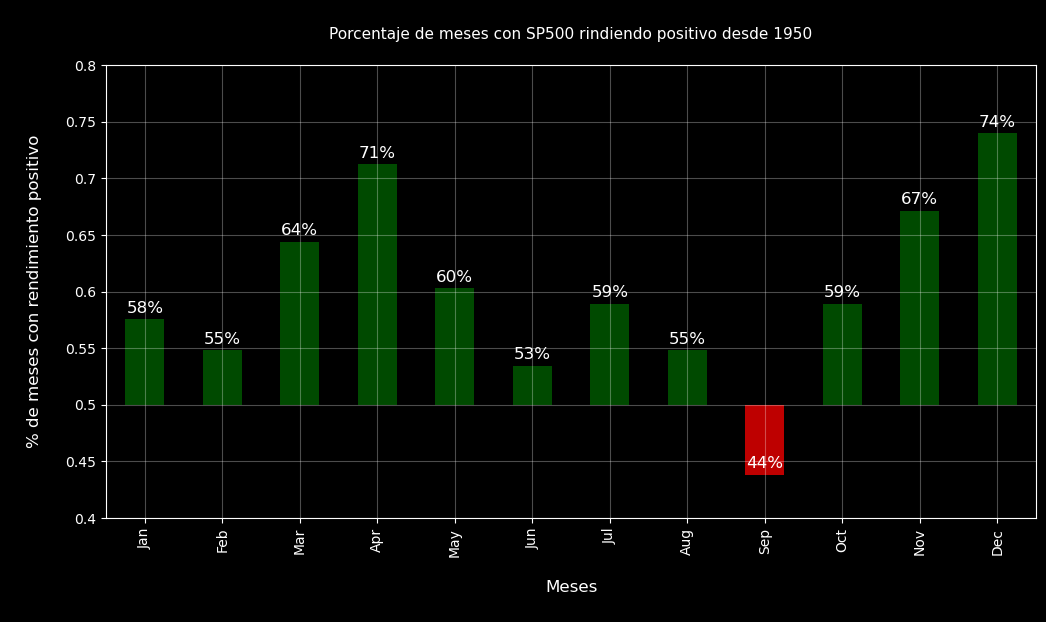

In [26]:
meses_positivos = (tabla > 0).sum().divide(len(tabla)).add(-0.5)
colors = np.where(meses_positivos>0, 'darkgreen','red')

plt.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')
fig, ax_sup = plt.subplots(figsize=(12,6))
#ax.axis('off')


plots = meses_positivos.plot(kind='bar', color=colors, alpha=0.75, ax=ax_sup)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x+0.5,2)))
ax_sup.grid(alpha=0.3)
ax_sup.set_title('\nPorcentaje de meses con SP500 rindiendo positivo desde 1950\n', fontsize=11)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()+0.5, '.0%'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')

ax_sup.set_ylim(-0.1,0.3)
ax_sup.set_ylabel('\n% de meses con rendimiento positivo\n', fontsize=12)
ax_sup.set_xlabel('\nMeses\n', fontsize=12)


plt.show()

In [27]:
medias = tabla.mean()
medianas = tabla.median()

chart = pd.concat([medias, medianas], axis=1)
chart.columns = ['medias','medianas']

plt.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,6))
plots = chart.plot(kind='bar', color=['blue','gray'], alpha=0.75, ax=ax)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x,2)))
ax.grid(alpha=0.3)
ax.set_title('\nRendimiento medio/mediano SP500 desde 1950\n', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='bottom', size=10, xytext=(0, 8),
                   textcoords='offset points', rotation=90)

ax.set_ylim(-0.01,0.03)
ax.set_ylabel('\nRendimiento %\n', fontsize=12)
ax.set_xlabel('\nMeses\n', fontsize=12)

plt.show()

NameError: name 'pd' is not defined